In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# load the dataset
dataframe = pandas.read_csv('40_20.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

401 198


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+5
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
390/390 - 3s - loss: 0.0219 - 3s/epoch - 7ms/step
Epoch 2/100
390/390 - 1s - loss: 0.0138 - 619ms/epoch - 2ms/step
Epoch 3/100
390/390 - 1s - loss: 0.0135 - 604ms/epoch - 2ms/step
Epoch 4/100
390/390 - 1s - loss: 0.0133 - 633ms/epoch - 2ms/step
Epoch 5/100
390/390 - 1s - loss: 0.0133 - 597ms/epoch - 2ms/step
Epoch 6/100
390/390 - 1s - loss: 0.0130 - 617ms/epoch - 2ms/step
Epoch 7/100
390/390 - 1s - loss: 0.0128 - 622ms/epoch - 2ms/step
Epoch 8/100
390/390 - 1s - loss: 0.0128 - 616ms/epoch - 2ms/step
Epoch 9/100
390/390 - 1s - loss: 0.0127 - 606ms/epoch - 2ms/step
Epoch 10/100
390/390 - 1s - loss: 0.0126 - 581ms/epoch - 1ms/step
Epoch 11/100
390/390 - 1s - loss: 0.0125 - 590ms/epoch - 2ms/step
Epoch 12/100
390/390 - 1s - loss: 0.0125 - 606ms/epoch - 2ms/step
Epoch 13/100
390/390 - 1s - loss: 0.0125 - 600ms/epoch - 2ms/step
Epoch 14/100
390/390 - 1s - loss: 0.0125 - 588ms/epoch - 2ms/step
Epoch 15/100
390/390 - 1s - loss: 0.0124 - 602ms/epoch - 2ms/step
Epoch 16/100
390/390 -

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

6/6 [==============================] - 0s 3ms/step
Train Score: 50.39 RMSE
Test Score: 123.88 RMSE


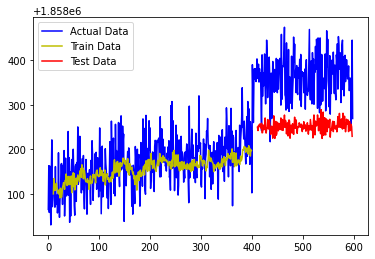

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),'b-',label='Actual Data')
plt.plot(trainPredictPlot,'y-',label='Train Data')
plt.plot(testPredictPlot,'r-',label='Test Data')
plt.legend()
plt.show()

In [ ]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr
 
# # Import your data into Python
# df = pd.read_csv("Auto.csv")
 
# Convert dataframe into series
list1 = dataset
list2 = testPredict

print(len(list1),len(list2))
# # Apply the pearsonr()
# corr, _ = pearsonr(list1, list2)
# print('Pearsons correlation: %.3f' % corr)

599 187
